![Astrofisica Computacional](logo.PNG)

# Sunpy

<p style="font-size:36px">A Python package for Solar Physics</p>

# Associated Packages
![paquetes](affiliated_packages.png)

# Main components of Sunpy
![components](components.png)

<h1>Downloading data (Fido is a simple, asynchronous HTTP client)</h1>
<h4>Sadly Fido is now RETIRED, meaning that it will no longer be updated</h4>

<p style="font-size:28px">Main servers to download solar data:</p>
<ul>
 <li style="font-size:26px"> JSOC --  Joint Science Operations Center</li>
    <ul>
        <li style="font-size:24px">
            Main database for SDO-HMI, SDO-AIA, SOHO-MDI and IRIS telescopes and instruments
        </li>
    </ul>
 <li style="font-size:26px"> NOAA -- National Oceanic and Atmospheric Administration </li>
    <ul>
       <li style="font-size:24px">Database for GOES-I, GOES-P and GOES-R series</li>
    </ul>
 <li style="font-size:26px">VSO -- Virtual Solar Observatory</li>
    <ul>
       <li style="font-size:24px">This database contain most of the satellites and instruments active observing the Sun</li>
    </ul>
 <li style="font-size:26px">FTP -- File Transfer Protocol</li>
    <ul>
       <li style="font-size:24px">Accept quiet OK any ftp server.</li>
    </ul>
</ul>
<p style="font-size:28px">What kind of features are included when we use Fido and JSOC (main features of Sunpy are developed to/for SDO).</p>
<ul>
<li style="font-size:26px">time: date-time, time ranges, different time scales.</li>
<li style="font-size:26px">wavelength: Some instruments have different filters and wavelengths.</li>
<li style="font-size:26px">instrument: Some telescopes have on board multiple instruments, then sometimes it is better to choose only one instrument.</li>
<li style="font-size:26px">physobs: Some instrument, even have different physical observations (e.g. Intensity, Magnetogram, Stokes vector,...)</li>
<li style="font-size:26px">and some others.</li>
</ul>

# Some examples

## Acquiring data

In [1]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

ModuleNotFoundError: No module named 'sunpy'

In [65]:
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


In [66]:
a.Time('2012/3/4', '2012/3/6')

<sunpy.net.attrs.Time(2012-03-04 00:00:00.000, 2012-03-06 00:00:00.000)>

In [67]:
print(a.Instrument)

sunpy.net.attrs.Instrument

Specifies the Instrument name for the search.

       Attribute Name       ...
--------------------------- ...
aia                         ...
bcs                         ...
be_continuum                ...
be_halpha                   ...
bigbear                     ...
caii                        ...
cds                         ...
celias                      ...
cerrotololo                 ...
chp                         ...
cook                        ...
costep                      ...
cp                          ...
dpm                         ...
eis                         ...
eit                         ...
elteide                     ...
erne                        ...
eui                         ...
eve                         ...
eve                         ...
film                        ...
five_12_channelmagnetograph ...
foxsi                       ...
gbm                         ...
goes                        ...
golf                        .

In [68]:
print(a.Physobs)

sunpy.net.attrs.Physobs

Specifies the physical observable the VSO can search for.

    Attribute Name    ...
--------------------- ...
composition           ...
equivalent_width      ...
flux                  ...
flux                  ...
intensity             ...
intensity             ...
irradiance            ...
irradiance            ...
irradiance            ...
irradiance            ...
los_magnetic_field    ...
los_magnetic_field    ...
los_velocity          ...
number_density        ...
particle_flux         ...
particle_velocity     ...
polarization_vector   ...
spectrum              ...
srs                   ...
stokes_parameters     ...
summary_lightcurve    ...
sunspotnumber         ...
sunspotnumber         ...
thermal_velocity      ...
vector_magnetic_field ...
vector_magnetic_field ...
wave_power            ...


In [6]:
results = Fido.search(a.Time('2012/3/4', '2012/3/4'), a.Instrument.aia,)
print(results)

Results from 1 Provider:

2 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 135.578 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-03-04 00:00:00.000 2012-03-04 00:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 00:00:00.000 2012-03-04 00:00:01.000    SDO ...    FULLDISK 64.64844




In [7]:
print(results.all_colnames)

['End Time', 'Extent Length', 'Extent Type', 'Extent Width', 'Instrument', 'Physobs', 'Provider', 'Size', 'Source', 'Start Time', 'Wavelength', 'Wavetype', 'fileid']


In [8]:
print(results.show("Wavelength"))

Results from 1 Provider:

2 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

  Wavelength  
   Angstrom   
--------------
171.0 .. 171.0
211.0 .. 211.0




In [9]:
results = Fido.search(a.Time('2012/3/4', '2012/3/4'), a.Instrument.aia,a.Wavelength(171*u.angstrom))
print(results)

Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-03-04 00:00:00.000 2012-03-04 00:00:01.000    SDO ...    FULLDISK 64.64844




In [10]:
results = Fido.search(a.Time('2012/3/4', '2012/3/5'), a.Instrument.aia,a.Wavelength(171*u.angstrom), a.Sample(120*u.minute))
print(results)

2025-07-09 22:17:13 - sunpy - WARNING: SunpyConnectionWarning: Connection to http://docs.virtualsolar.org/WSDL/VSOi_rpc_literal.wsdl failed with error <urlopen error [Errno -2] Name or service not known>. Retrying with different url and port.
2025-07-09 22:17:14 - zeep.wsdl.bindings.soap - WARNING: Forcing soap:address location to HTTPS
2025-07-09 22:17:19 - zeep.wsdl.bindings.soap - WARNING: Forcing soap:address location to HTTPS


Results from 1 Provider:

13 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 881.254 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-03-04 00:00:00.000 2012-03-04 00:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 02:00:00.000 2012-03-04 02:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 04:00:00.000 2012-03-04 04:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 06:00:00.000 2012-03-04 06:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 08:00:00.000 2012-03-04 08:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 10:00:00.000 2012-03-04 10:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 12:00:00.000 2012-03-04 12:00:01.000    SDO ...    FULLDISK 64.64844
2012-03-04 14:00:00.000 2012-03-04 14:00:01.000    SDO ... 

In [11]:
results = Fido.search(a.Time('2012/3/4', '2012/3/4 02:00'),a.Instrument.lyra | a.Instrument.rhessi)
print(results)

Results from 3 Providers:

2 Results from the LYRAClient:
Source: http://proba2.oma.be/lyra/data/bsd

       Start Time               End Time        Instrument ... Provider Level
----------------------- ----------------------- ---------- ... -------- -----
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     2
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     3

1 Results from the RHESSIClient:
Source: https://hesperia.gsfc.nasa.gov/hessidata

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999     RHESSI ... RHESSI     NASA

3 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- --

In [12]:
print(results['lyra'])

       Start Time               End Time        Instrument ... Provider Level
----------------------- ----------------------- ---------- ... -------- -----
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     2
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA ...      ESA     3


In [13]:
print(results['rhessi'])

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999     RHESSI ... RHESSI     NASA


In [14]:
print(results['vso'])

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-03-03 22:57:40.000 2012-03-04 00:33:20.000 RHESSI ... PARTIAL_SUN -0.00098
2012-03-04 00:33:20.000 2012-03-04 01:45:40.000 RHESSI ... PARTIAL_SUN -0.00098
2012-03-04 01:45:40.000 2012-03-04 02:09:00.000 RHESSI ... PARTIAL_SUN -0.00098


In [16]:
results = Fido.search(a.Time("2020/01/01", "2020/01/01 00:01"), a.Instrument.aia | a.Instrument.hmi)
print(results)

Results from 2 Providers:

41 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 2.779 Gbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2020-01-01 00:00:00.000 2020-01-01 00:00:01.000    SDO ...    FULLDISK 64.64844
2020-01-01 00:00:04.000 2020-01-01 00:00:05.000    SDO ...    FULLDISK 64.64844
2020-01-01 00:00:05.000 2020-01-01 00:00:06.000    SDO ...    FULLDISK 64.64844
2020-01-01 00:00:05.000 2020-01-01 00:00:06.000    SDO ...    FULLDISK 64.64844
2020-01-01 00:00:06.000 2020-01-01 00:00:07.000    SDO ...    FULLDISK 64.64844
2020-01-01 00:00:09.000 2020-01-01 00:00:10.000    SDO ...    FULLDISK 64.64844
                    ...                     ...    ... ...         ...      ...
2020-01-01 00:00:52.000 2020-01-01 00:00:53.000    SDO ...  

In [17]:
print(results.all_colnames)

['End Time', 'Extent Length', 'Extent Type', 'Extent Width', 'Instrument', 'Physobs', 'Provider', 'Size', 'Source', 'Start Time', 'Wavelength', 'Wavetype', 'fileid']


In [18]:
print(results.show("Start Time", "Instrument", "Physobs", "Wavelength"))

Results from 2 Providers:

41 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time       Instrument  Physobs     Wavelength   
                                                 Angstrom    
----------------------- ---------- --------- ----------------
2020-01-01 00:00:00.000        AIA intensity   335.0 .. 335.0
2020-01-01 00:00:04.000        AIA intensity   193.0 .. 193.0
2020-01-01 00:00:05.000        AIA intensity   304.0 .. 304.0
2020-01-01 00:00:05.000        AIA intensity 4500.0 .. 4500.0
2020-01-01 00:00:06.000        AIA intensity   131.0 .. 131.0
2020-01-01 00:00:09.000        AIA intensity   171.0 .. 171.0
                    ...        ...       ...              ...
2020-01-01 00:00:52.000        AIA intensity   193.0 .. 193.0
2020-01-01 00:00:53.000        AIA intensity   304.0 .. 304.0
2020-01-01 00:00:54.000        AIA intensity   131.0 .. 131.0
2020-01-01 00:00:57.000        AIA intensity   171.0 .. 171.0
2020-01-01 00:00:57.000   

In [19]:
aia, hmi = results

In [20]:
hmi_los = hmi[hmi["Physobs"] == "LOS_magnetic_field"]
print(hmi_los.show("Start Time", "Instrument", "Wavelength", "Physobs"))

       Start Time       Instrument    Wavelength         Physobs      
                                       Angstrom                       
----------------------- ---------- ---------------- ------------------
2020-01-01 00:00:22.000        HMI 6173.0 .. 6174.0 LOS_magnetic_field


In [21]:
aia_171 = aia[aia["Wavelength"][:, 0] == 171 * u.AA]
aia_171.show("Start Time", "Instrument", "Wavelength", "Physobs")

<sunpy.net.vso.table_response.VSOQueryResponseTable object at 0x7b34552c0fd0>
       Start Time       Instrument   Wavelength    Physobs 
                                      Angstrom             
----------------------- ---------- -------------- ---------
2020-01-01 00:00:09.000        AIA 171.0 .. 171.0 intensity
2020-01-01 00:00:21.000        AIA 171.0 .. 171.0 intensity
2020-01-01 00:00:33.000        AIA 171.0 .. 171.0 intensity
2020-01-01 00:00:45.000        AIA 171.0 .. 171.0 intensity
2020-01-01 00:00:57.000        AIA 171.0 .. 171.0 intensity

In [24]:
downloaded_files = Fido.fetch(aia_171, path='~/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/')

Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

2025-07-10 00:20:00 - parfive - INFO: https://sdo7.nascom.nasa.gov/cgi-bin/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1356912047-1356912047 failed to download with exception

2025-07-10 00:20:00 - parfive - INFO: https://sdo7.nascom.nasa.gov/cgi-bin/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1356912059-1356912059 failed to download with exception

2025-07-10 00:20:00 - parfive - INFO: https://sdo7.nascom.nasa.gov/cgi-bin/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1356912071-1356912071 failed to download with exception

2025-07-10 00:20:00 - parfive - INFO: https://sdo7.nascom.nasa.gov/cgi-bin/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1356912083-1356912083 failed to download with exception

2025-07-10 00:20:00 - parfive - INFO: https://sdo7.nascom.nasa.gov/cgi-bin/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1356912095-1356912095 failed to download with exception



5/0 files failed to download. Please check `.errors` for details


In [25]:
import glob
folder = "/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/"
files = sorted(glob.glob(folder+"aia_lev1_171*.fits"))
print(files)

['/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/aia_lev1_171a_2020_01_01t00_00_09_35z_image_lev1.fits', '/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/aia_lev1_171a_2020_01_01t00_00_21_35z_image_lev1.fits', '/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/aia_lev1_171a_2020_01_01t00_00_33_35z_image_lev1.fits', '/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/aia_lev1_171a_2020_01_01t00_00_45_35z_image_lev1.fits', '/home/hypnus1803/Desktop/Documents2025/ComputationalAstrophysics/Lecture2/DataTests/aia_lev1_171a_2020_01_01t00_00_57_35z_image_lev1.fits']


# Creating maps

In [26]:
import sunpy.map as smap

In [27]:
my_map = smap.Map(files[0])

<sunpy.map.sources.sdo.AIAMap object at 0x7ed8691edfd0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2020-01-01 00:00:09
Exposure Time:		 2.000154 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.599489 0.599489] arcsec / pix
Reference Pixel:	 [2055.19165  2046.020142] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1,  0, -1, ..., -2,  0, -1],
       [ 2,  2,  1, ...,  0,  0, -1],
       [ 2,  2,  0, ...,  0, -1,  0],
       ...,
       [ 2,  1,  1, ..., -1,  0, -1],
       [ 2, -1, -2, ...,  0, -2,  3],
       [ 1, -1,  1, ...,  1,  1,  1]], dtype=int16)
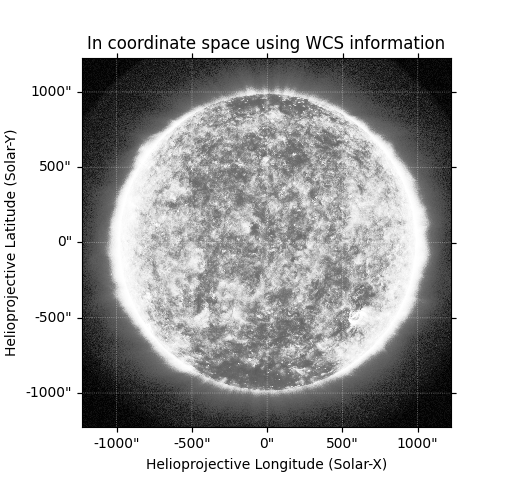
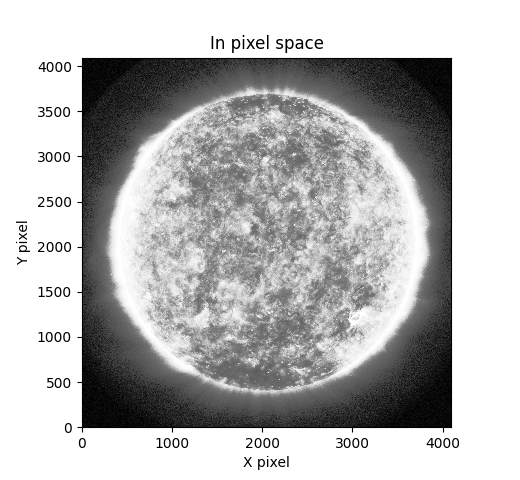
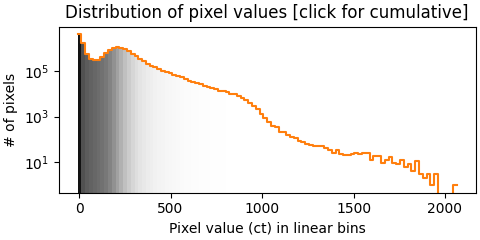
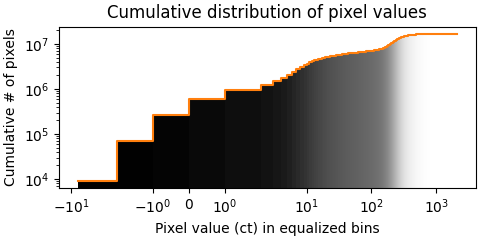

In [28]:
my_map

## Making some inspection into our map object

In [29]:
my_map.date

<Time object: scale='utc' format='isot' value=2020-01-01T00:00:09.350>

In [30]:
my_map.exposure_time

<Quantity 2.000154 s>

<p style="font-size:28px">But, how to obtain the data array?</p>

In [31]:
my_map.data

array([[-1,  0, -1, ..., -2,  0, -1],
       [ 2,  2,  1, ...,  0,  0, -1],
       [ 2,  2,  0, ...,  0, -1,  0],
       ...,
       [ 2,  1,  1, ..., -1,  0, -1],
       [ 2, -1, -2, ...,  0, -2,  3],
       [ 1, -1,  1, ...,  1,  1,  1]], dtype=int16)

In [32]:
print(my_map.dimensions)
print(my_map.dtype)

PixelPair(x=<Quantity 4096. pix>, y=<Quantity 4096. pix>)
int16


## Look over past lectures

<p style="font-size:26px">Coordinates and Reference Systems</p>

In [33]:
my_map.coordinate_frame

<Helioprojective Frame (obstime=2020-01-01T00:00:09.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2020-01-01T00:00:09.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01457442, -2.94634244, 1.47081754e+11)>)>

In [34]:
print(my_map.center)
print(my_map.bottom_left_coord)
print(my_map.top_right_coord)

<SkyCoord (Helioprojective: obstime=2020-01-01T00:00:09.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2020-01-01T00:00:09.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01457442, -2.94634244, 1.47081754e+11)>): (Tx, Ty) in arcsec
    (-4.61135752, 0.88560853)>
<SkyCoord (Helioprojective: obstime=2020-01-01T00:00:09.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2020-01-01T00:00:09.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01457442, -2.94634244, 1.47081754e+11)>): (Tx, Ty) in arcsec
    (-1231.63776854, -1226.94431364)>
<SkyCoord (Helioprojective: obstime=2020-01-01T00:00:09.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2020-01-01T00:00:09.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01457442, -2.94634244, 1.47081754e+11)>): (Tx, Ty) in arcsec
    (1222.41537986, 1228.71576318)>


# Plotting our maps

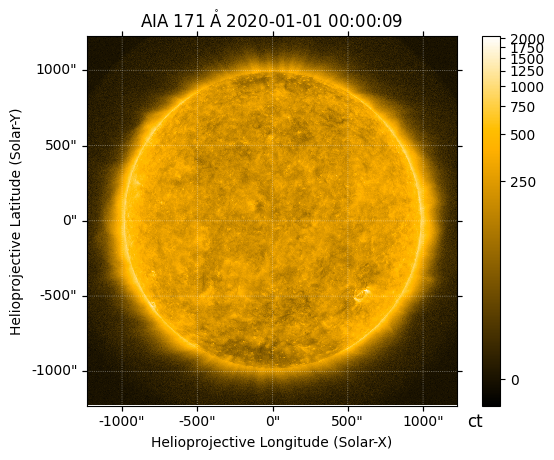

In [32]:
my_map.peek()

<p style="font-size:26px">But this function is not flexible.</p>

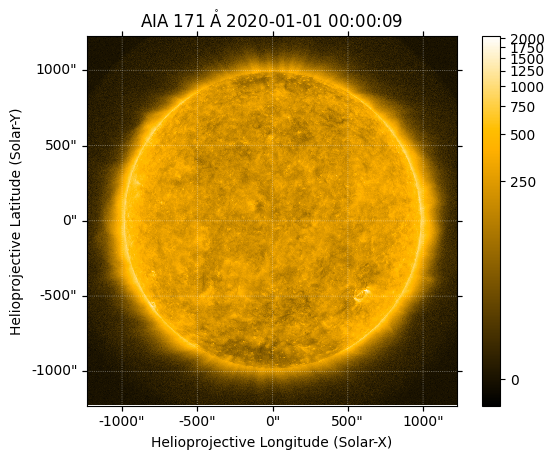

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax)
plt.colorbar()
plt.show()

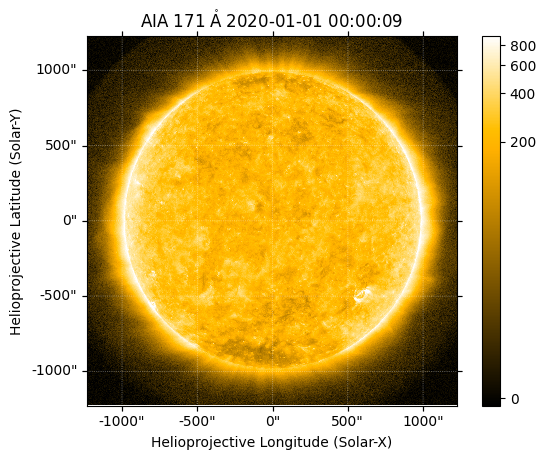

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.9)*u.percent)
plt.colorbar()
plt.show()

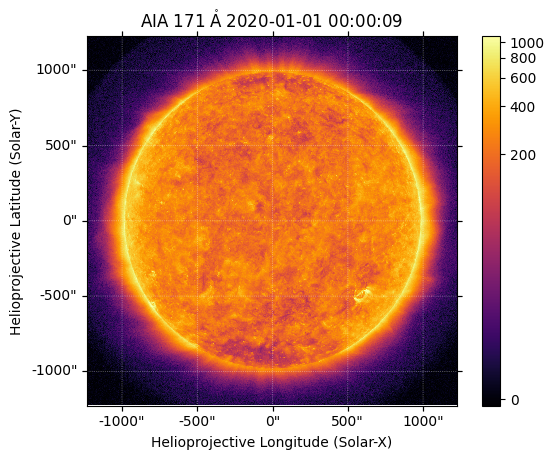

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, cmap='inferno', clip_interval=(1,99.99)*u.percent)
plt.colorbar()
plt.show()

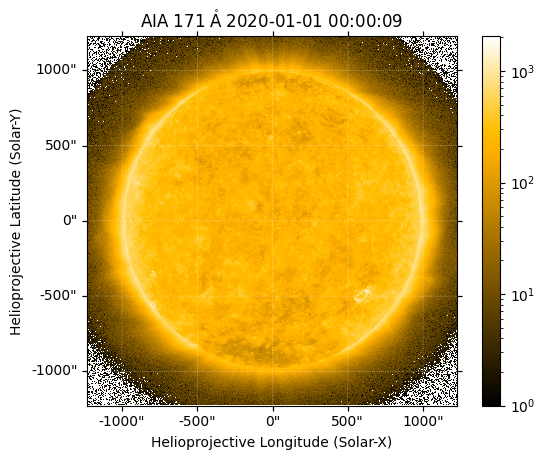

In [36]:
import matplotlib.colors

fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

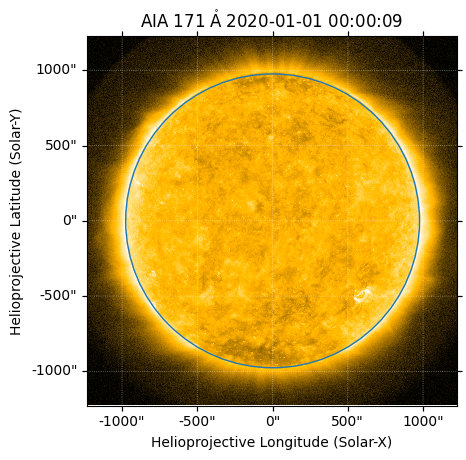

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1,99.99)*u.percent)
my_map.draw_limb(axes=ax, color='C0')
plt.show()

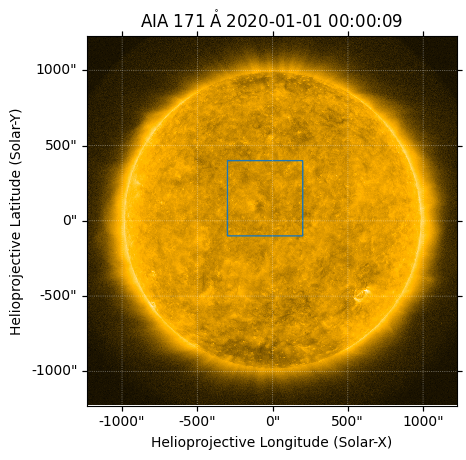

In [38]:
from astropy.coordinates import SkyCoord
roi_bottom_left = SkyCoord(Tx=-300*u.arcsec, Ty=-100*u.arcsec, frame=my_map.coordinate_frame)
roi_top_right = SkyCoord(Tx=200*u.arcsec, Ty=400*u.arcsec, frame=my_map.coordinate_frame)
fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, )
my_map.draw_quadrangle(roi_bottom_left, top_right=roi_top_right, axes=ax, edgecolor='C0')
plt.show()

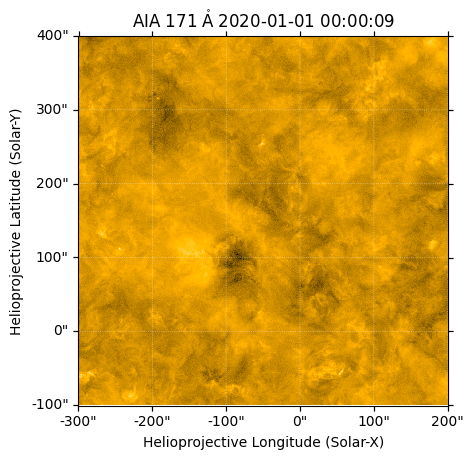

In [39]:
my_submap = my_map.submap(roi_bottom_left, top_right=roi_top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=my_submap)
my_submap.plot(axes=ax)
plt.show()

In [35]:
sequence = smap.Map(files,sequence=True)

In [36]:
%matplotlib qt
sequence.peek()

# Time Series
<p style="font-size:28px">Another kind of data which we observe in astronomy are the time series</p>

In [42]:
import sunpy.timeseries
import sunpy.data.sample

sunpy.data.sample.GOES_XRS_TIMESERIES
my_timeseries = sunpy.timeseries.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES)

In [43]:
print(my_timeseries)

SunPy TimeSeries
----------------
Observatory:			GOES-15
Instrument:			<a href=https://www.swpc.noaa.gov/products/goes-x-ray-flux target="_blank">X-ray Detector</a>
Channel(s):			xrsa<br>xrsb
Start Date:			2011-06-07 00:00:00
End Date:			2011-06-07 23:59:58
Center Date:			2011-06-07 11:59:58
Resolution:			2.048 s
Samples per Channel:		42177
Data Range(s):		xrsa   3.64E-06<br>xrsb   2.54E-05
Units:			W / m2
                                       xrsa          xrsb
2011-06-06 23:59:59.961999893  1.000000e-09  1.887100e-07
2011-06-07 00:00:02.008999944  1.000000e-09  1.834600e-07
2011-06-07 00:00:04.058999896  1.000000e-09  1.860900e-07
2011-06-07 00:00:06.104999900  1.000000e-09  1.808400e-07
2011-06-07 00:00:08.151999950  1.000000e-09  1.860900e-07
...                                     ...           ...
2011-06-07 23:59:49.441999912  1.000000e-09  1.624800e-07
2011-06-07 23:59:51.488999844  1.000000e-09  1.624800e-07
2011-06-07 23:59:53.538999915  1.000000e-09  1.598500e-07
2011-06-07

In [44]:
my_timeseries.columns

['xrsa', 'xrsb']

In [45]:
my_timeseries.time

<Time object: scale='utc' format='iso' value=['2011-06-06 23:59:59.962' '2011-06-07 00:00:02.009'
 '2011-06-07 00:00:04.059' ... '2011-06-07 23:59:53.539'
 '2011-06-07 23:59:55.585' '2011-06-07 23:59:57.632']>

In [46]:
my_timeseries.time_range

    Start: 2011-06-06 23:59:59
    End:   2011-06-07 23:59:57
    Center:2011-06-07 11:59:58
    Duration:0.9999730324069096 days or
           23.99935277776583 hours or
           1439.9611666659498 minutes or
           86397.66999995698 seconds

# Finally We can plot

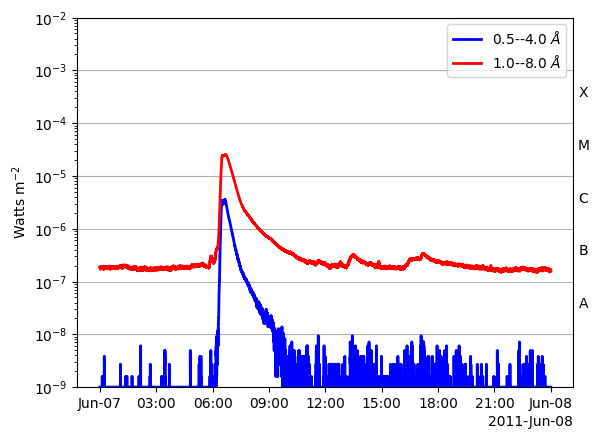

In [47]:
%matplotlib inline
fig, ax = plt.subplots()
my_timeseries.plot(axes=ax)
plt.show()

# Another examples

In [48]:
import os

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [49]:
start_time = Time('2012-09-24T14:56:03', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

In [50]:
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

In [51]:
jsoc_email = "jicamposr@unal.edu.co" # resgister e-mail in http://jsoc.stanford.edu/ajax/register_email.html

In [52]:
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128




In [53]:
files = Fido.fetch(query)
files.sort()

2025-07-09 22:25:23 - drms - INFO: Export request pending. [id=JSOC_20250709_002304, status=2]
2025-07-09 22:25:23 - drms - INFO: Waiting for 0 seconds...


7 URLs found for download. Full request totalling 7MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

In [56]:
%matplotlib qt
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

plt.show()

# Working without SunPy

In [57]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [58]:
hdu = fits.open('DataTests/ManchaNew1/RawContinuum/hmi.ic_720s.20230725_004800_TAI.3.continuum.fits')
print(hdu.info())

Filename: DataTests/ManchaNew1/RawContinuum/hmi.ic_720s.20230725_004800_TAI.3.continuum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    112   (695, 695)   int16   
None


In [59]:
im = hdu[1].data
hdr = hdu[1].header

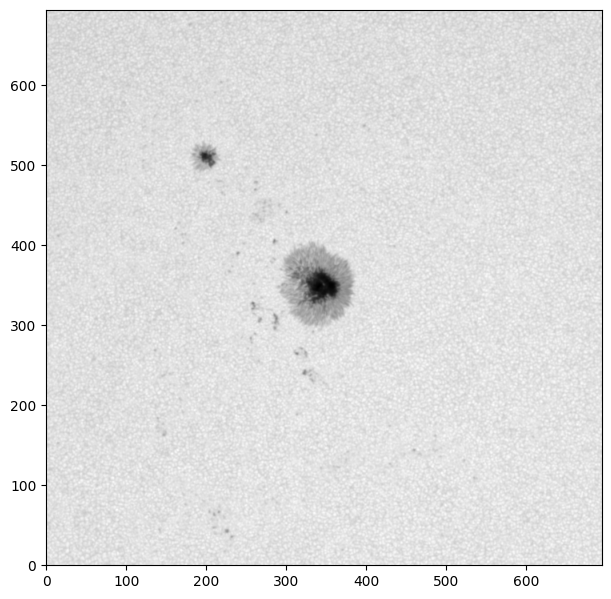

In [60]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6),layout='constrained')
ax.imshow(im,origin='lower',cmap='gray')

Text(0, 0.5, 'y-axis [pixels]')

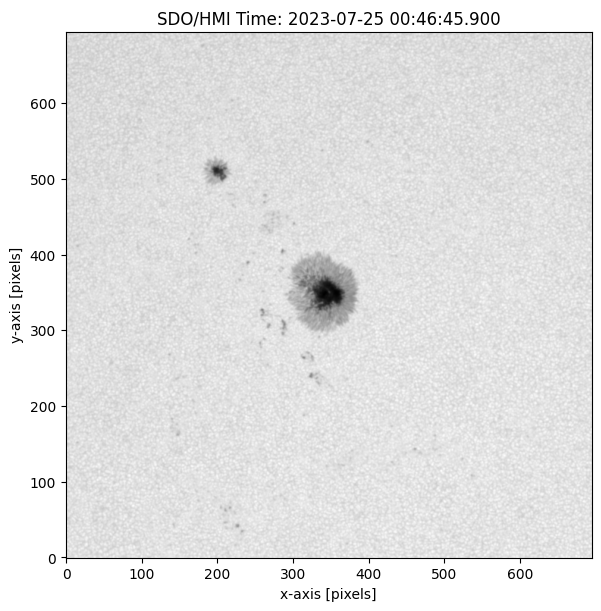

In [61]:
fig, ax = plt.subplots(figsize=(6,6),layout='constrained')
ax.imshow(im,origin='lower',cmap='gray')
ax.set_title(f"SDO/HMI Time: {hdr['date-obs'].replace('T',' ')}")
ax.set_xlabel('x-axis [pixels]')
ax.set_ylabel('y-axis [pixels]')

Text(0, 0.5, 'y-axis [arcseconds]')

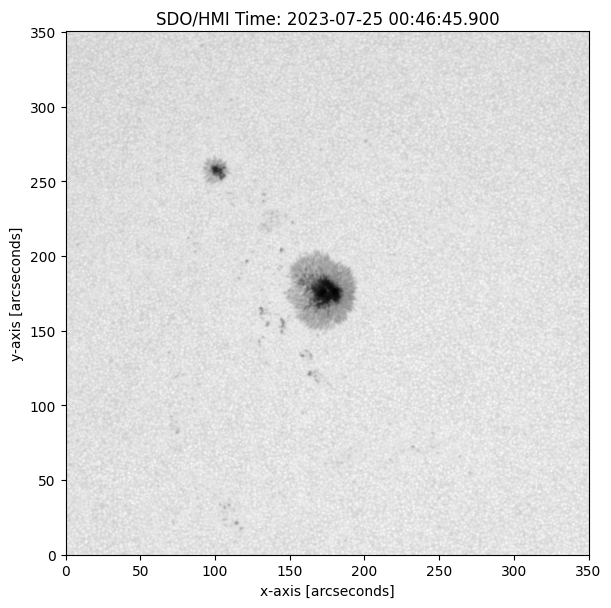

In [62]:
fig, ax = plt.subplots(figsize=(6,6),layout='constrained')
ax.imshow(im,origin='lower',cmap='gray',extent=(0,im.shape[1]*hdr['cdelt1'],0,im.shape[0]*hdr['cdelt2']))
ax.set_title(f"SDO/HMI Time: {hdr['date-obs'].replace('T',' ')}")
ax.set_xlabel('x-axis [arcseconds]')
ax.set_ylabel('y-axis [arcseconds]')

# Working with several files

In [63]:
import glob

folder = 'DataTests/ManchaNew1/RawContinuum/'
files = sorted(glob.glob(folder+'*.fits'))

datacube = np.zeros([len(files),*im.shape])
for i in range(len(files)):
    datacube[i,...] = fits.getdata(files[i],1)

### watching outside the notebook

# Some results examples

# Possible Projects

<h1>Possible Projects</h1>
<h4>I will present several proyects, and then we will decide between two or three</h4>

<ul>
 <li style="font-size:26px"> Choose a Sunspot and track it. The track must include statistics such as: coordinates position, areas, Net magnetic field (search and get magnetograms too), and others you want to include. </li>
 <li style="font-size:26px"> Segmentation: I will provide high-resolution data (the gif of the SST sunspot). You can use multiple image techniques as well as machine learning. </li>
 <li style="font-size:26px"> Use machine learning (preferibly PIML) to remove p-modes (5-minutes) natual oscillations in the Sun. </li>
 <li style="font-size:26px"> Choose five ISSUES in the SunPy Github repository, then we will decide together three of them to solve them. Preferibly the most interesting issues. </li>
    
</ul>
 

In [ ]:
Helioviewer